<a href="https://colab.research.google.com/github/RhythmRhythmm/Eda/blob/main/EDA_MOD_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import plotly.graph_objects as go
from  datetime import datetime

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/salemprakash/EDA/main/Data/orange_juice_withmissing.csv")
data

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1.0
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1.0
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0.0
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0


In [3]:
#MOD 2

In [4]:
data.dtypes

,0
Purchase,object
WeekofPurchase,int64
StoreID,float64
PriceCH,float64
PriceMM,float64
DiscCH,float64
DiscMM,float64
SpecialCH,float64
SpecialMM,float64
LoyalCH,float64


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Purchase        1070 non-null   object 
 1   WeekofPurchase  1070 non-null   int64  
 2   StoreID         1069 non-null   float64
 3   PriceCH         1069 non-null   float64
 4   PriceMM         1066 non-null   float64
 5   DiscCH          1068 non-null   float64
 6   DiscMM          1066 non-null   float64
 7   SpecialCH       1068 non-null   float64
 8   SpecialMM       1065 non-null   float64
 9   LoyalCH         1065 non-null   float64
 10  SalePriceMM     1065 non-null   float64
 11  SalePriceCH     1069 non-null   float64
 12  PriceDiff       1069 non-null   float64
 13  Store7          1070 non-null   object 
 14  PctDiscMM       1065 non-null   float64
 15  PctDiscCH       1068 non-null   float64
 16  ListPriceDiff   1070 non-null   float64
 17  STORE           1068 non-null   f

In [6]:
#  Dimensions
data.shape

(1070, 18)

In [7]:
data.size

19260

In [8]:
# No of dimensions
data.ndim

2

In [9]:
# No of non null values
data.count().sum()

19220

In [10]:
# DATA CLEANING

In [11]:
# Check for column-wise na values
data.isna().sum()

,0
Purchase,0
WeekofPurchase,0
StoreID,1
PriceCH,1
PriceMM,4
DiscCH,2
DiscMM,4
SpecialCH,2
SpecialMM,5
LoyalCH,5


In [12]:
#total na values before filling
data.isna().sum().sum()

40

In [13]:
#Mean of column PriceMM
x = round(data['PriceMM'].mean(),2)
x

2.09

In [14]:
data.PriceMM.fillna(value = x,inplace=True)

<ipython-input-14-cf69cf6f7932>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.PriceMM.fillna(value = x,inplace=True)


In [15]:
#Mean of column LoyalCH
y = round(data['LoyalCH'].mean(),2)
y

0.57

In [16]:
data.LoyalCH.fillna(value = y,inplace=True)

<ipython-input-16-65990a95028c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.LoyalCH.fillna(value = y,inplace=True)


In [17]:
# Replaced 4 na values of PriceMM with mean
# Replaced 5 na values of LoyalCH with mean
# Now no of na values is 31 only (Earlier it was 40)

data.isna().sum().sum()

31

In [18]:
# Remove null or empty records
data = data.dropna()
data

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1.0
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1.0
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0.0
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0


In [19]:
# Total no of duplicates
data.duplicated().sum()

23

In [20]:
data = data.drop_duplicates()
data

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
0,CH,237,1.0,1.75,1.99,0.00,0.00,0.0,0.0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1.0
1,CH,239,1.0,1.75,1.99,0.00,0.30,0.0,1.0,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1.0
2,CH,245,1.0,1.86,2.09,0.17,0.00,0.0,0.0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1.0
3,MM,227,1.0,1.69,1.69,0.00,0.00,0.0,0.0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1.0
4,CH,228,7.0,1.69,1.69,0.00,0.00,0.0,0.0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,CH,252,7.0,1.86,2.09,0.10,0.00,0.0,0.0,0.587822,2.09,1.76,0.33,Yes,0.000000,0.053763,0.23,0.0
1066,CH,256,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.670258,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1067,MM,257,7.0,1.86,2.18,0.00,0.00,0.0,0.0,0.736206,2.18,1.86,0.32,Yes,0.000000,0.000000,0.32,0.0
1068,CH,261,7.0,1.86,2.13,0.00,0.24,0.0,0.0,0.588965,1.89,1.86,0.03,Yes,0.112676,0.000000,0.27,0.0


In [21]:
# Summary of data
data.describe()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
count,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,254.328417,3.941003,1.866844,2.084641,0.050442,0.121475,0.144543,0.161259,0.568501,1.963451,1.816401,0.147050,0.058373,0.026587,0.218083,1.635202
std,15.591687,2.308078,0.102010,0.133665,0.115032,0.212337,0.351812,0.367950,0.306931,0.250569,0.142050,0.269824,0.100991,0.061006,0.107392,1.428637
min,227.000000,1.000000,1.690000,1.690000,0.000000,0.000000,0.000000,0.000000,0.000011,1.190000,1.390000,-0.670000,0.000000,0.000000,0.000000,0.000000
25%,240.000000,2.000000,1.790000,1.990000,0.000000,0.000000,0.000000,0.000000,0.323840,1.690000,1.750000,0.000000,0.000000,0.000000,0.140000,0.000000
50%,257.000000,3.000000,1.860000,2.090000,0.000000,0.000000,0.000000,0.000000,0.600000,2.090000,1.860000,0.230000,0.000000,0.000000,0.240000,2.000000
75%,268.000000,7.000000,1.990000,2.180000,0.000000,0.200000,0.000000,0.000000,0.852695,2.130000,1.890000,0.320000,0.112676,0.000000,0.300000,3.000000
max,278.000000,7.000000,2.090000,2.290000,0.500000,0.800000,1.000000,1.000000,0.999947,2.290000,2.090000,0.640000,0.402010,0.252688,0.440000,4.000000


In [22]:
# Binning
bins1 = data['Equal width binning'] = pd.cut(data['PriceCH'], bins=5, labels=False)
bins1

<ipython-input-22-6bd535677e63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins1 = data['Equal width binning'] = pd.cut(data['PriceCH'], bins=5, labels=False)


,PriceCH
0,0
1,0
2,2
3,0
4,0
...,...
1065,2
1066,2
1067,2
1068,2


In [23]:
bins2 = data['Equal frequency binning'] = pd.qcut(data['PriceCH'], q=5, labels=False,duplicates = 'drop')
bins2

<ipython-input-23-e3d48cd5eb4a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bins2 = data['Equal frequency binning'] = pd.qcut(data['PriceCH'], q=5, labels=False,duplicates = 'drop')


,PriceCH
0,0
1,0
2,1
3,0
4,0
...,...
1065,1
1066,1
1067,1
1068,1


In [24]:
#Outliers Detection based on Inter-Quartile range
Q1 = data['LoyalCH'].quantile(0.25)
Q3 = data['LoyalCH'].quantile(0.75)
IQR = Q3 - Q1
data['LoyalCH'] >= IQR

,LoyalCH
0,False
1,True
2,True
3,False
4,True
...,...
1065,True
1066,True
1067,True
1068,True


In [25]:
 # MOD 3

In [26]:
#Measures of central tendency

mean = data['SalePriceMM'].mean()
median = data['SalePriceMM'].median()
mode = data['SalePriceMM'].mode()
print(mean,median,mode)

1.9634513274336283 2.09 0    2.09
Name: SalePriceMM, dtype: float64


Text(0.5, 0, 'StoreID')

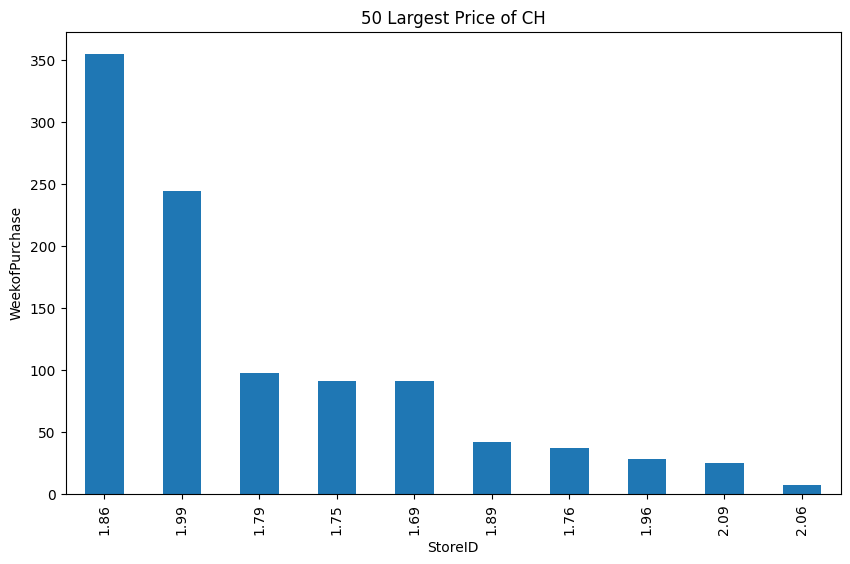

In [27]:
#50 largest values of PriceCh

data.PriceCH.value_counts().nlargest(50).plot(kind='bar', figsize=(10,6))
plt.title("50 Largest Price of CH")
plt.ylabel('WeekofPurchase')
plt.xlabel('StoreID')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


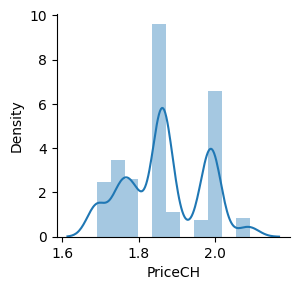

In [28]:
#Univariate Analysis

#Distribution plot for PriceCH
sns.FacetGrid(data).map(sns.distplot,"PriceCH").add_legend()

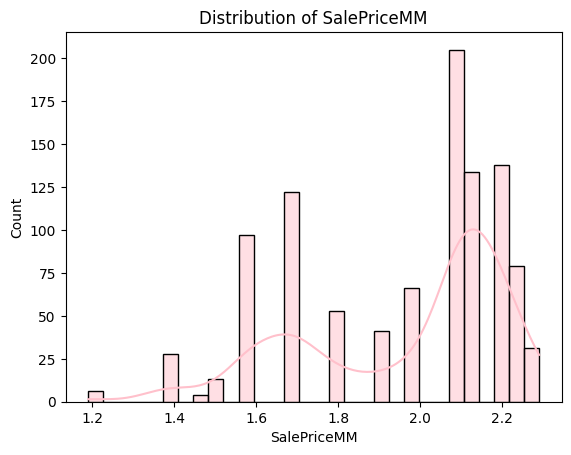

In [29]:
#Histogram for SalePriceMM
sns.histplot(data['SalePriceMM'], bins=30, kde=True, color='pink')
plt.title(f'Distribution of SalePriceMM')
plt.xlabel('SalePriceMM')
plt.show()

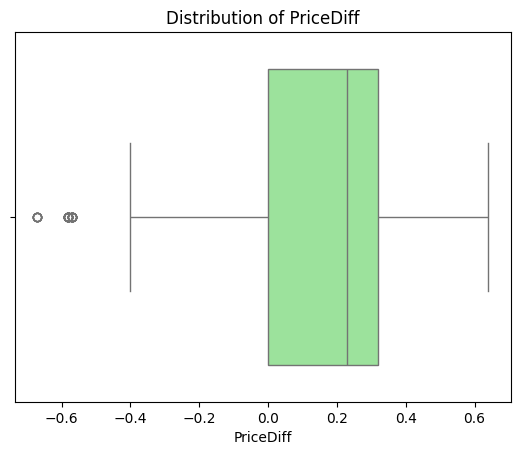

In [30]:
# Box plot of PriceDiff
sns.boxplot(x="PriceDiff",data=data,color = 'lightgreen')
plt.title(f'Distribution of PriceDiff')
plt.xlabel('PriceDiff')
plt.show()

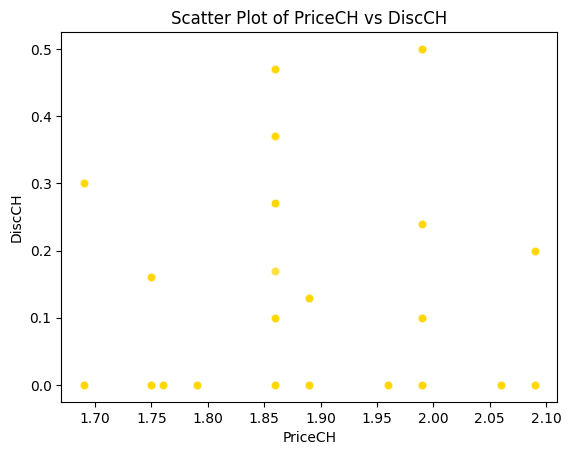

In [31]:
#Bivariate Analysis

sns.scatterplot(data=data, y='DiscCH', x='PriceCH', color='gold', alpha=0.5)
plt.title('Scatter Plot of PriceCH vs DiscCH')
plt.ylabel('DiscCH')
plt.xlabel('PriceCH')
plt.show()

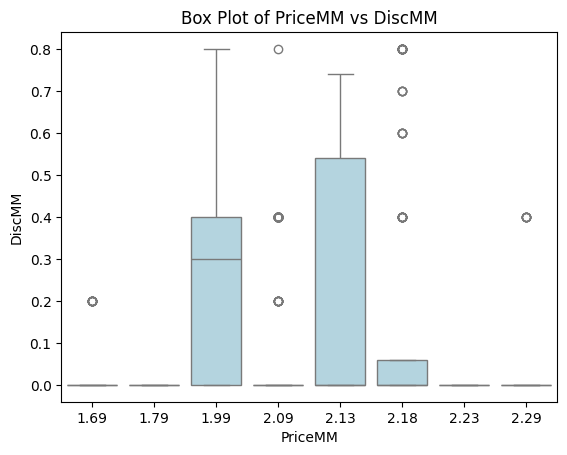

In [32]:
#Box Plot of PriceMM vs DiscMM
sns.boxplot(x='PriceMM',y='DiscMM',data=data,color = 'lightblue')
plt.title('Box Plot of PriceMM vs DiscMM')
plt.ylabel('DiscMM')
plt.xlabel('PriceMM')
plt.show()

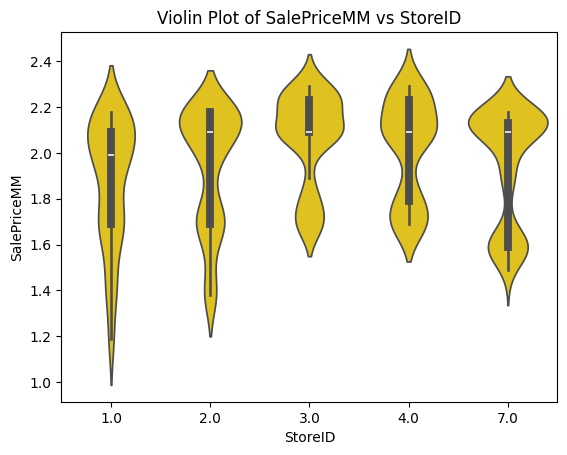

In [33]:
#Violin plot
sns.violinplot(data=data, x='StoreID', y='SalePriceMM',color = 'gold')
plt.title('Violin Plot of SalePriceMM vs StoreID')
plt.xlabel('StoreID')
plt.ylabel('SalePriceMM')
plt.show()

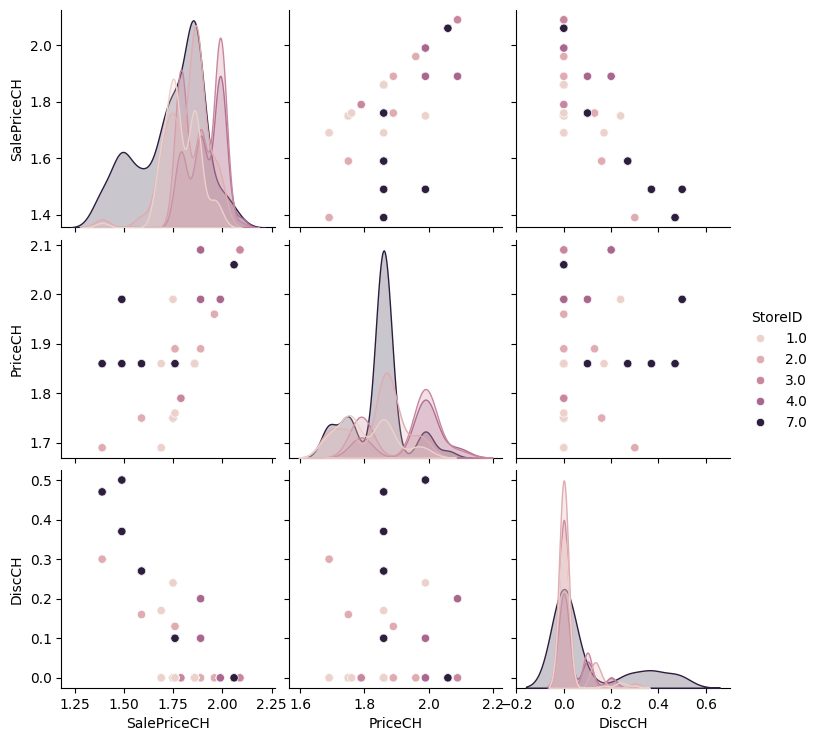

In [34]:
#Multivariate Analysis

#Pair plots of SalePriceCH, PriceCH, DiscCH with hue = StoreID
sns.pairplot(data, hue='StoreID', vars=['SalePriceCH', 'PriceCH', 'DiscCH'])
plt.show()

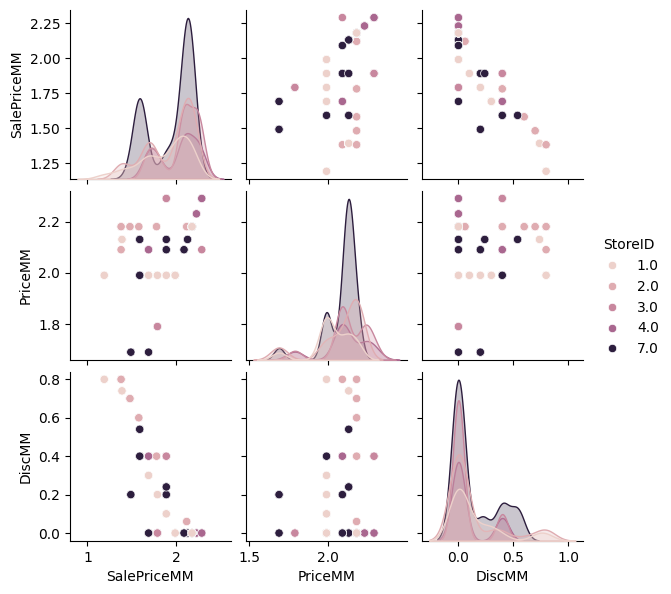

In [35]:
#Pair plots of SalePriceMM, PriceMM, DiscMM with hue = StoreID

sns.pairplot(data,height=2,vars = ['SalePriceMM', 'PriceMM', 'DiscMM'],hue='StoreID')
plt.show()

In [36]:
#correlation
correlation = data.corr(method='pearson', numeric_only=True)
correlation

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Equal width binning,Equal frequency binning
WeekofPurchase,1.000000,0.092792,0.711952,0.582668,0.353621,0.248219,0.108866,0.058699,0.191425,0.101181,0.224911,-0.024445,0.229320,0.342673,0.050588,-0.048656,0.734258,0.603822
StoreID,0.092792,1.000000,0.022576,0.086389,0.323026,0.018293,0.369299,-0.162630,0.233981,0.029965,-0.245374,0.157005,0.022272,0.324287,0.084639,-0.525612,0.081969,-0.024585
PriceCH,0.711952,0.022576,1.000000,0.613294,0.147441,0.132554,-0.095057,-0.016320,0.080294,0.216103,0.598731,-0.114523,0.115373,0.130085,-0.183584,0.396840,0.971116,0.953198
PriceMM,0.582668,0.086389,0.613294,1.000000,0.062548,0.002588,-0.035838,-0.067665,0.126402,0.531300,0.389773,0.288188,-0.018156,0.056859,0.662197,0.102940,0.619433,0.533153
DiscCH,0.353621,0.323026,0.147441,0.062548,1.000000,0.020573,0.535663,-0.057497,0.126242,0.015433,-0.703919,0.384912,0.017573,0.999015,-0.063368,-0.234091,0.181732,0.125538
DiscMM,0.248219,0.018293,0.132554,0.002588,0.020573,1.000000,0.158939,0.466594,-0.019233,-0.845361,0.078531,-0.826377,0.998794,0.020756,-0.121102,-0.119117,0.107980,0.079115
SpecialCH,0.108866,0.369299,-0.095057,-0.035838,0.535663,0.158939,1.000000,-0.149825,0.132648,-0.154274,-0.502043,0.121038,0.163022,0.549313,0.044596,-0.316016,-0.068938,-0.137827
SpecialMM,0.058699,-0.162630,-0.016320,-0.067665,-0.057497,0.466594,-0.149825,1.000000,-0.102533,-0.431036,0.034841,-0.418619,0.466998,-0.060972,-0.067640,-0.078964,-0.013795,-0.032589
LoyalCH,0.191425,0.233981,0.080294,0.126402,0.126242,-0.019233,0.132648,-0.102533,1.000000,0.083189,-0.044570,0.100716,-0.021470,0.125888,0.079800,-0.093644,0.102835,0.045259
SalePriceMM,0.101181,0.029965,0.216103,0.531300,0.015433,-0.845361,-0.154274,-0.431036,0.083189,1.000000,0.142692,0.853516,-0.855459,0.012246,0.456478,0.156697,0.240119,0.218580


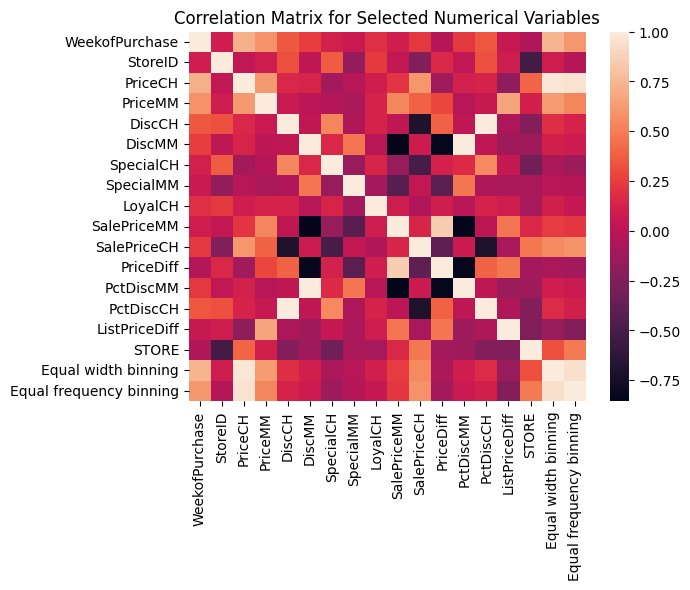

In [37]:
#Correlation analysis using a heatmap
sns.heatmap(correlation, xticklabels=correlation.columns,
            yticklabels=correlation.columns)
plt.title('Correlation Matrix for Selected Numerical Variables')
plt.show()

In [38]:
#Time Series Analysis

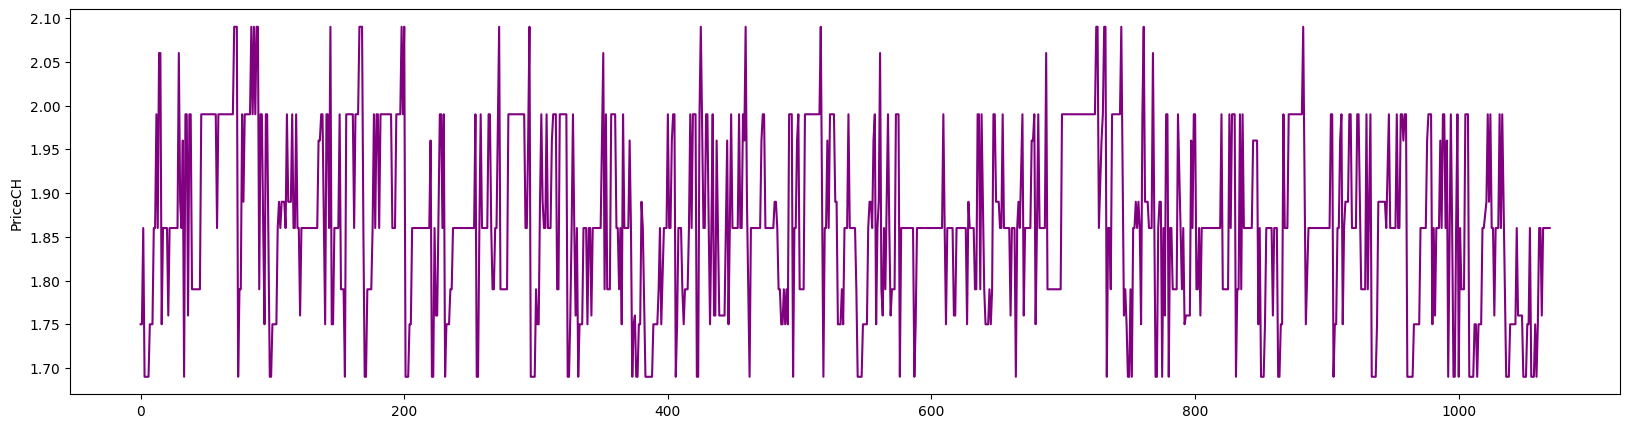

In [39]:
#Line Plot for PriceCH
plt.figure(figsize=(20,5))
plot = sns.lineplot(data=data['PriceCH'],color = 'purple')
plt.show()

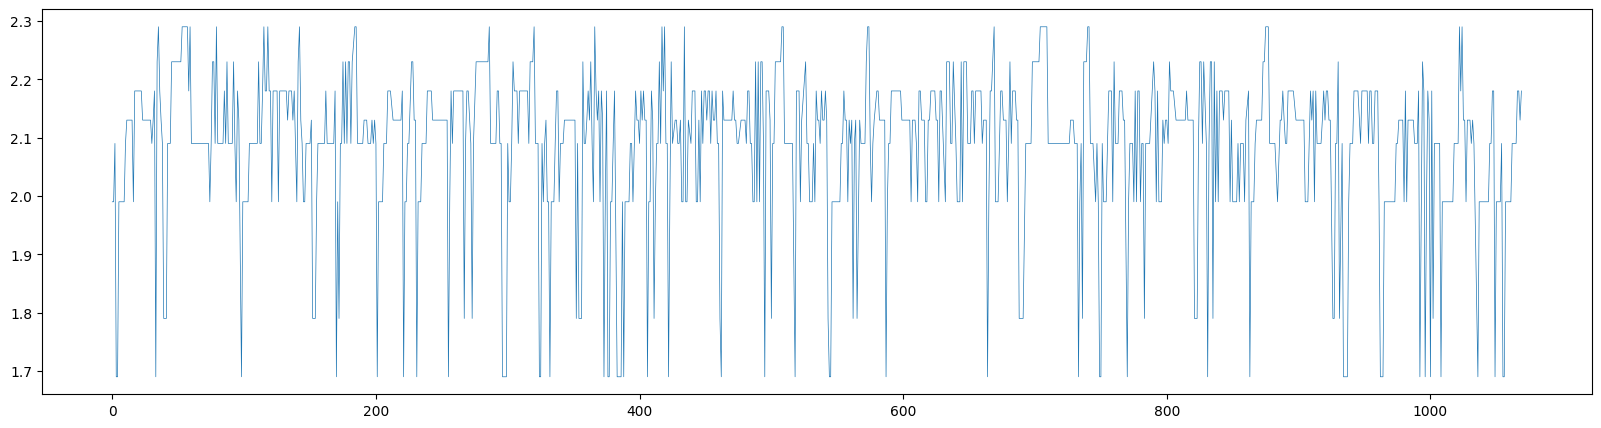

In [40]:
plt.figure(figsize=(20,5))
data['PriceMM'].plot(linewidth=0.5)
plt.show()

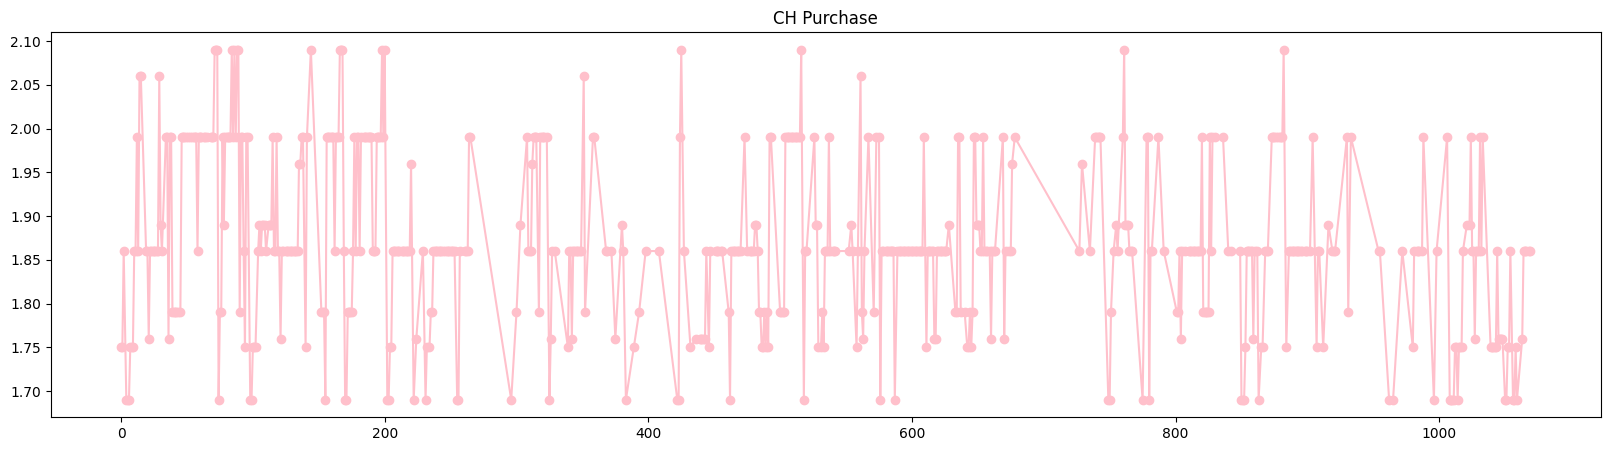

In [41]:
#DATA FILTERED FOR CH PURCHASE

plt.figure(figsize=(20,5))
# Filter the DataFrame for 'CH' in the 'Purchase' column
ch_data = data[data['Purchase'] == 'CH']

# Plotting 'PriceCH' for the filtered 'CH' data
ch = ch_data['PriceCH'].plot(marker='o', linestyle='-',color = 'pink')
ch.set_title('CH Purchase')
plt.show()

Text(0.5, 1.0, 'Discount less than 2 and greater than 0.2 for CH')

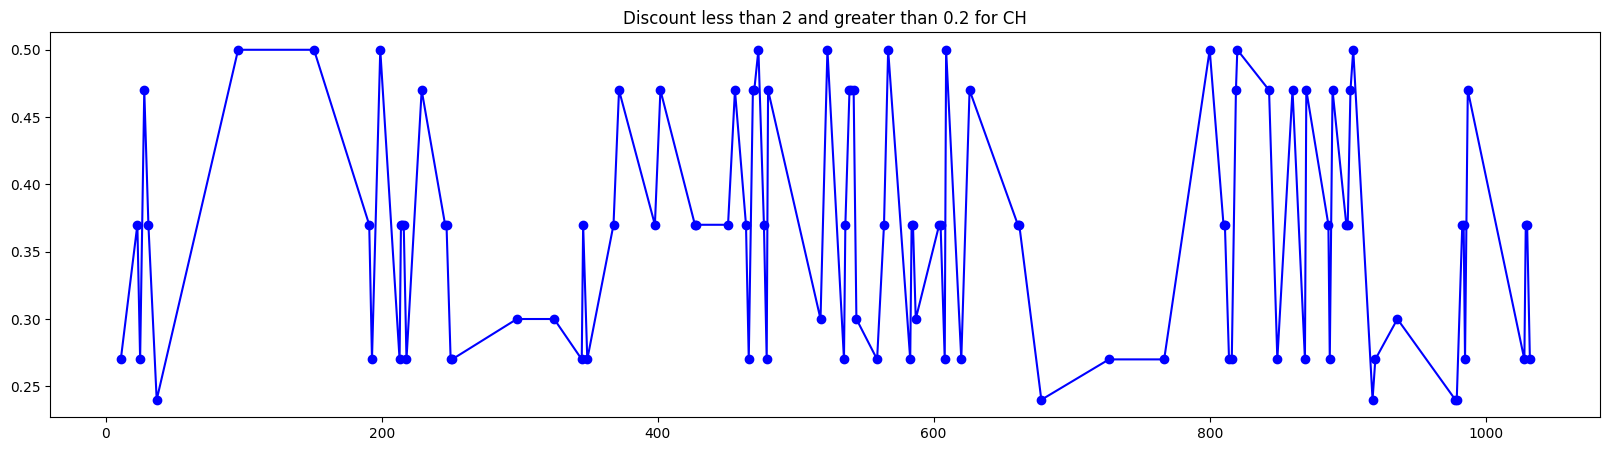

In [42]:
#Filter Data for discount less than 2 on CH
plt.figure(figsize=(20,5))

ch_disc = data[(data['DiscCH'] < 2) & (data['DiscCH'] > 0.2)]

ch = ch_disc['DiscCH'].plot(marker='o', linestyle='-',color = 'blue')
ch.set_title('Discount less than 2 and greater than 0.2 for CH')


<Axes: xlabel='StoreID', ylabel='PriceMM'>

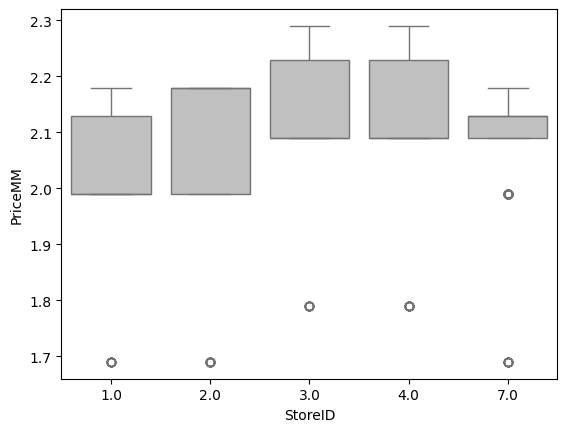

In [43]:
#Grouping time series data
#Group PriceMM by StoreID and display  in a boxplot

sns.boxplot(data=data, x='StoreID', y='PriceMM',color='silver')

<Axes: xlabel='Purchase', ylabel='PriceMM'>

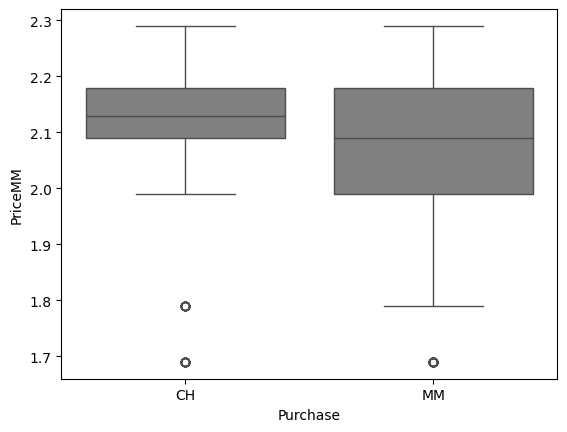

In [44]:
#Group PriceMM by type of Purchase and display  in a boxplot

sns.boxplot(data=data, x='Purchase', y='PriceMM',color='grey')

In [48]:
#MOD 4
#Contingency table

contingency_table = pd.pivot_table(data, values='StoreID', index='Purchase', columns='WeekofPurchase', aggfunc=np.sum)
print(contingency_table)

WeekofPurchase   227   228   229   230   231   232   233   234   235   236  \
Purchase                                                                     
CH              20.0  47.0  48.0  64.0  36.0  45.0  97.0  22.0  37.0  35.0   
MM              21.0  26.0  48.0  23.0  37.0  14.0  34.0  45.0  24.0  43.0   

WeekofPurchase  ...    269   270   271   272   273    274   275   276   277  \
Purchase        ...                                                           
CH              ...  139.0  53.0  54.0  78.0  39.0  136.0  24.0  39.0  75.0   
MM              ...   12.0  15.0  24.0  20.0  13.0   41.0  89.0  65.0  28.0   

WeekofPurchase   278  
Purchase              
CH              57.0  
MM              18.0  

[2 rows x 52 columns]


<ipython-input-48-96d7fa6b4f45>:4: FutureWarning:

The provided callable <function sum at 0x7a43013980d0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



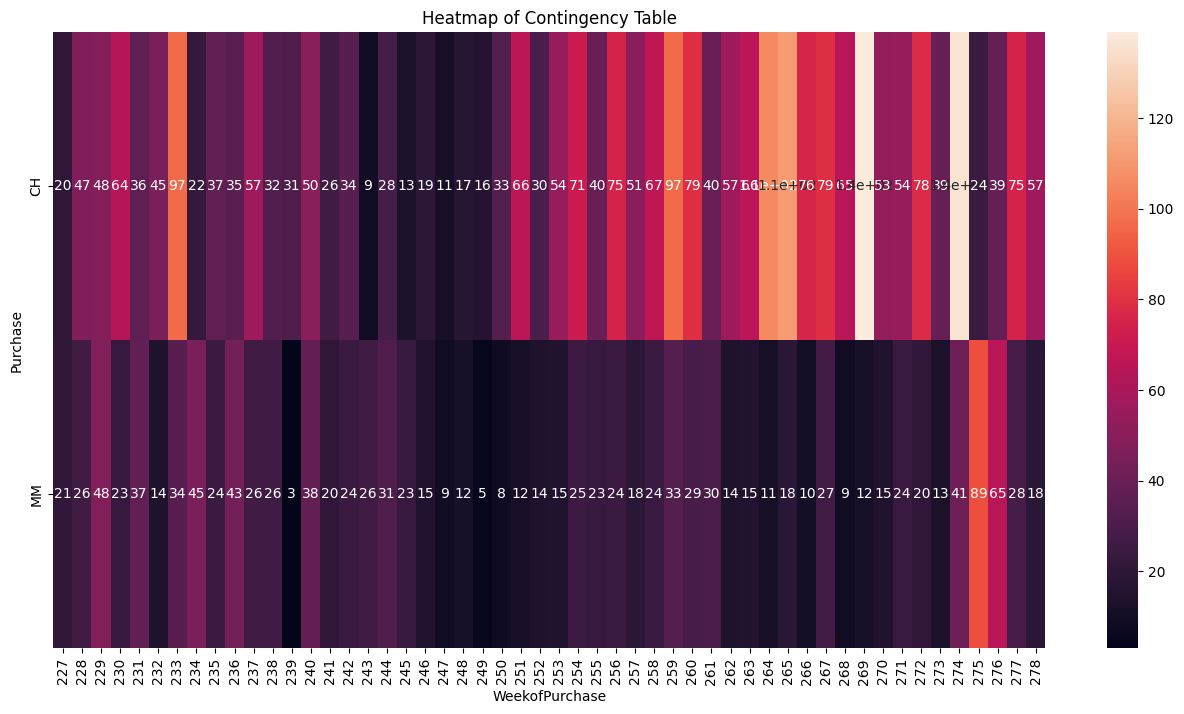

In [49]:
# 2-D statistical =analysis of weekofpurchase  vs  type of purchase
plt.figure(figsize=(16, 8))
sns.heatmap(contingency_table, annot=True, cbar=True)
plt.title("Heatmap of Contingency Table")
plt.show()

In [47]:
# Interactive 3D scatter plot
x = data['WeekofPurchase']
y = data['Purchase']
z = data['StoreID']

fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=2, color=z, colorscale='Viridis'))])
fig